# Exploratory Data Analysis

---

1. Import packages
2. Loading data with Pandas
3. Descriptive statistics of data
4. Data visualization
5. Data Cleaning
6. Hypothesis investigation
7. Feature Engineering
8. Modeling

---

## 1. Import packages

In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from functools import reduce
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)



## 2. Loading Data

In [2]:
# reading csv files
clients = pd.read_csv('./client_data.csv')
prices = pd.read_csv('./price_data.csv')

In [3]:
clients.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
prices.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## 3. Descriptive statistics of data


### Data types

In [5]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
clients.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
prices.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


## 4.Data Visualization 

### Churn Rate

Plotting the churn rate

In [9]:
churn = clients[['id','churn']]

In [10]:
def plot_stacked_bars (dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    # Plot stacked bars with annotations
    ax = dataframe.plot(kind="bar",
    stacked=True,
    figsize=size_,
    rot=rot_,
    title=title_)
    # Annotate bars
    annotate_stacked_bars (ax, textsize=14)
    # Rename legend
    plt.legend([ "Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
            
            
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    
    # Add value annotations to the bars
    # Iterate over the plotted rectanges/bars
    for p in ax. patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
            ((p.get_x( ) + p.get_width()/2) *pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize,
            )


In [11]:
churn

,id,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0
...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0
14602,d0a6f71671571ed83b2645d23af6de00,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0


In [12]:
churn_total=churn.groupby(churn["churn"]).count()
churn_percentage=churn_total/churn_total.sum()*100
churn_percentage

,id
churn,
0,90.284814
1,9.715186


In [13]:
clients.channel_sales.value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

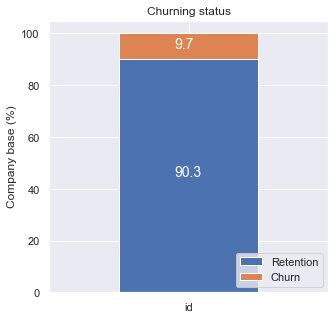

In [14]:
plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5),legend_="lower right")

### Sales channel
    The sales channel seems to be an important feature when predecting the churning of a user. 
    It is not the same if the sales were through email or telephone.

In [15]:
channel=clients[["id","channel_sales","churn"]]

channel=channel.groupby([channel["channel_sales"],channel["churn"]])["id"].count().unstack(level=1).fillna(0)
channel

churn,0,1
channel_sales,,
MISSING,3442.0,283.0
epumfxlbckeskwekxbiuasklxalciiuu,3.0,0.0
ewpakwlliwisiwduibdlfmalxowmwpci,818.0,75.0
fixdbufsefwooaasfcxdxadsiekoceaa,2.0,0.0
foosdfpfkusacimwkcsosbicdxkicaua,5934.0,820.0
lmkebamcaaclubfxadlmueccxoimlema,1740.0,103.0
sddiedcslfslkckwlfkdpoeeailfpeds,11.0,0.0
usilxuppasemubllopkaafesmlibmsdf,1237.0,138.0


In [16]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

In [17]:
channel_churn

churn,0,1
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,87.859046,12.140954
usilxuppasemubllopkaafesmlibmsdf,89.963636,10.036364
ewpakwlliwisiwduibdlfmalxowmwpci,91.601344,8.398656
MISSING,92.402685,7.597315
lmkebamcaaclubfxadlmueccxoimlema,94.411286,5.588714
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000


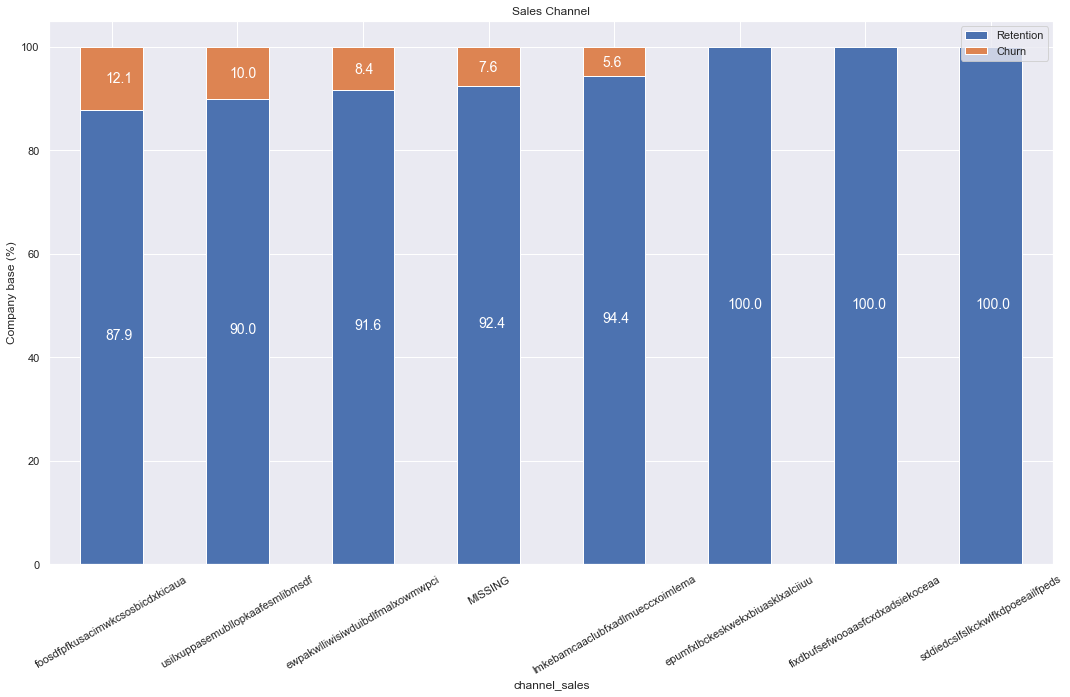

In [18]:
plot_stacked_bars(channel_churn,"Sales Channel",rot_=30)

### Consumption
Let's see the distribution of the consumption over the last year and last month

In [19]:
consumption=clients[["id","cons_12m","cons_gas_12m","cons_last_month","imp_cons","has_gas","churn"]]

In [20]:
def plot_distribution(dataframe,column,ax,bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp=pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                       "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist',bins=bins_,ax=ax,stacked=True)

    # X-axis label
    ax.set_xlabel(column)
    
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain',axis='x')

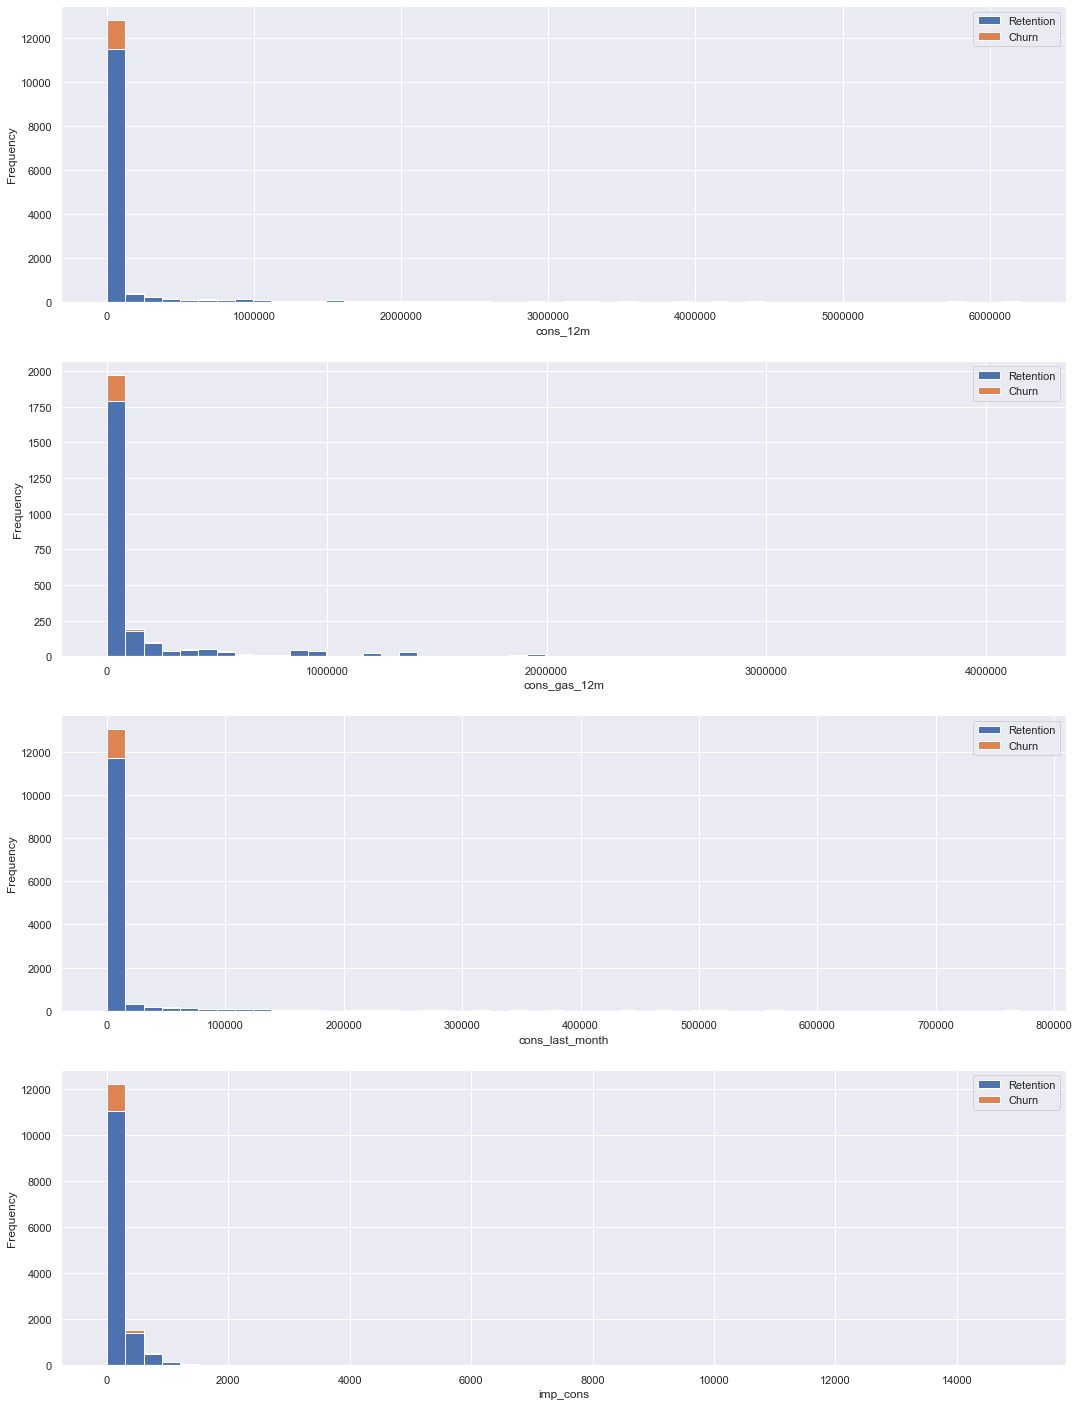

In [21]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
# Plot histogram
plot_distribution(consumption,"cons_12m",axs[0])
# Note that the gas consumption must have gas contract
plot_distribution(consumption[consumption["has_gas"]=="t"],"cons_gas_12m",axs[1])
plot_distribution(consumption,"cons_last_month",axs[2])
plot_distribution(consumption,"imp_cons",axs[3])

We can clearly see in here that the consumption data is highly
skewed to the right
, presenting a very long right-tail towards the higher values of thedistribution.

  The values on the higher end and lower ends of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in moredetail. 
  
  A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median,third quartile (Q3), and “maximum”). 
  
  It can tell us about our outliers and what their values are. It can also tell us if our data is symmetrical, how tightlyour data is grouped, and if and how our data is skewed.

C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\islam\anaconda3\lib\si

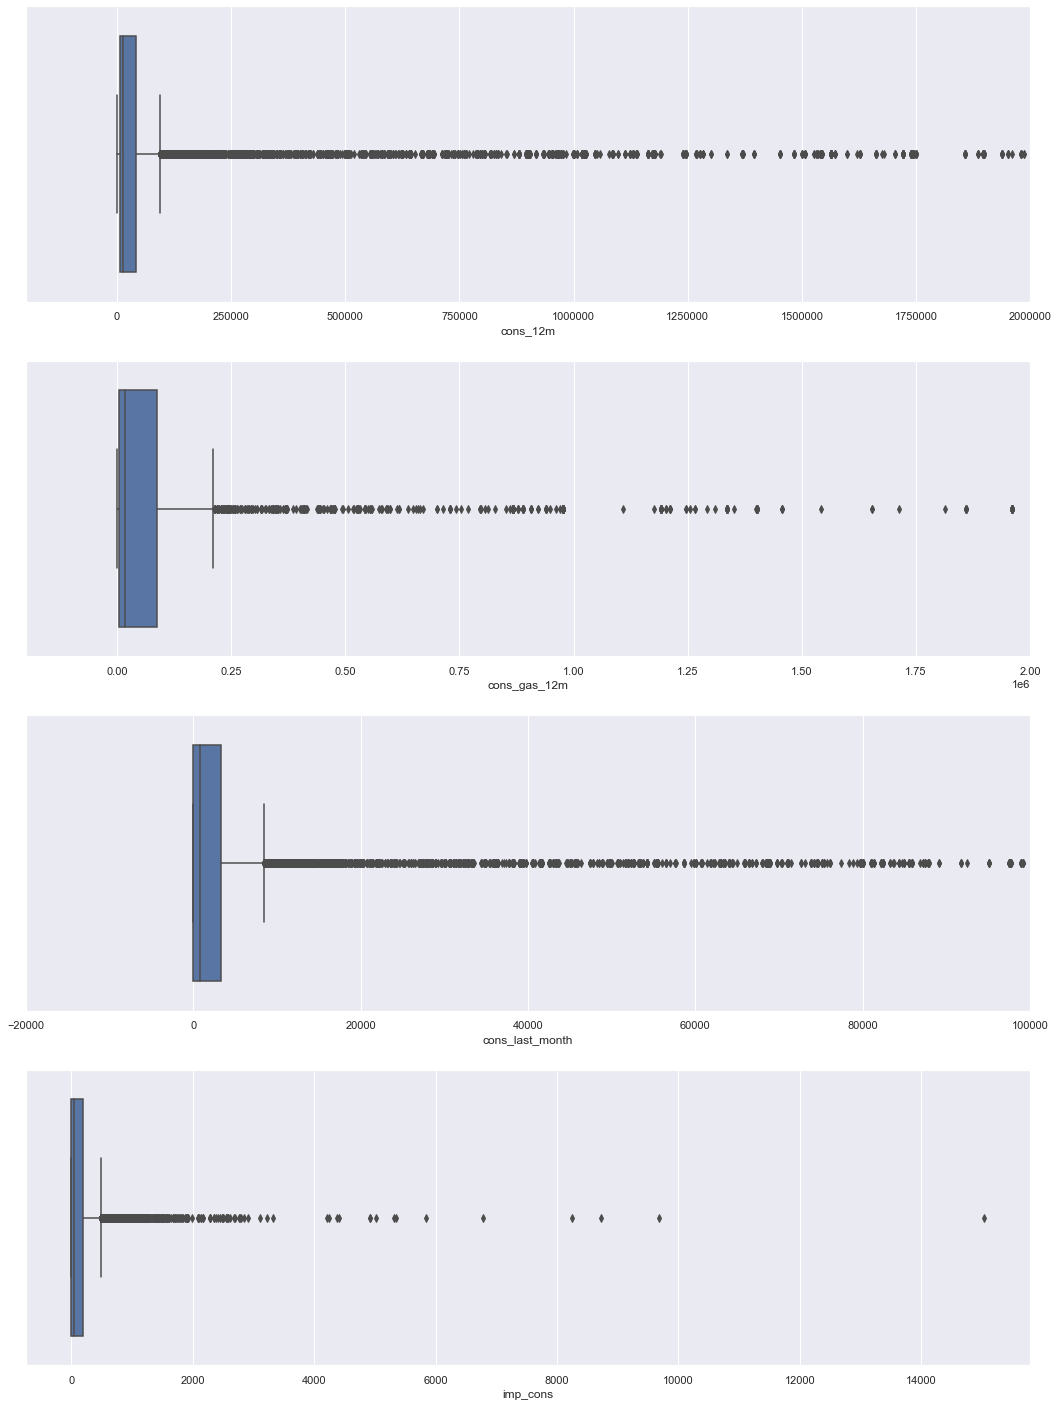

In [22]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))
# Plot histogram
sns.boxplot(consumption["cons_12m"],ax=axs[0])

sns.boxplot(consumption[consumption["has_gas"]=="t"]["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption["imp_cons"],ax=axs[3])

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain',axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000,2000000)
    axs[1].set_xlim(-200000,2000000)
    axs[2].set_xlim(-20000,100000)
    plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers.

We will deal with the skewness and outliers in the next exercise (
Data cleaning
)

### Dates

In [23]:
dates = clients[["id","date_activ","date_end", "date_modif_prod","date_renewal","churn"]].copy()

In [24]:
# Transform date columns to datetime type
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%Y-%m-%d')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%Y-%m-%d')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%Y-%m-%d')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%Y-%m-%d')

In [25]:
def plot_dates(dataframe, column, fontsize_=12):
    """ Plot monthly churn and retention distribution """
    # Group by month
    temp = dataframe[[column,
                      "churn", "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1) 
    # Plot
    ax=temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0) 
    # Change x-axis labels to months
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index)) 
    # Change xlabel size 
    plt.xticks(fontsize=fontsize_) 
    # Rename y-axis
    plt.ylabel("Number of companies") 
    # Rename legend
    plt.legend(["Retention", "Churn"], loc="upper right") 
    plt.show() 
    
def line_format(label):
    """ Convert time label to the format of pandas line plot """
    month = label.month_name()[:1] 
    if label.month_name() == "January": 
        month += f'\n{label.year}'
    return month


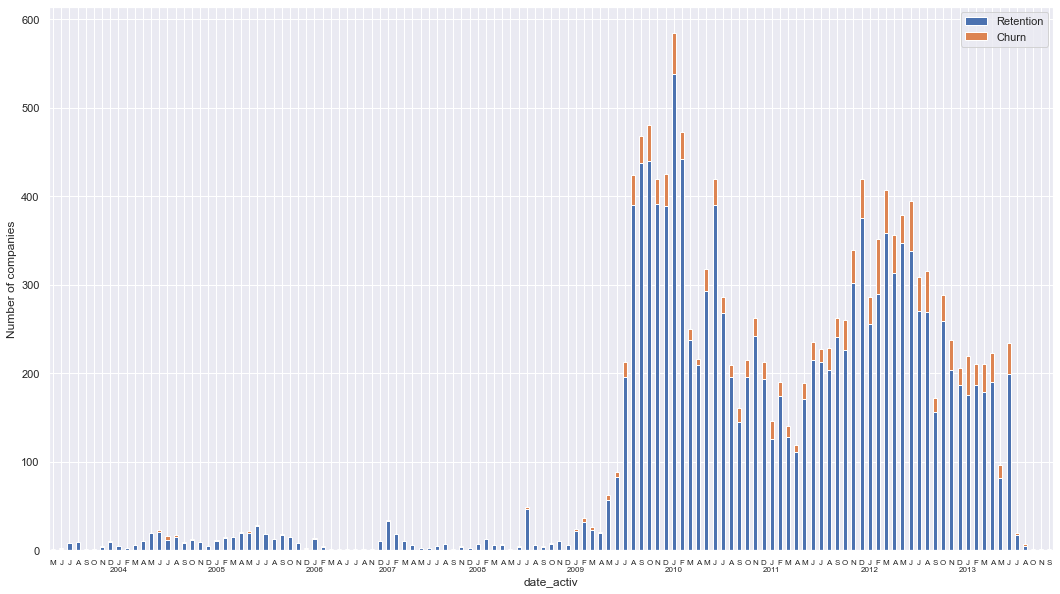

In [26]:
#churn during activation of the contract
plot_dates(dates, "date_activ", fontsize_=8)

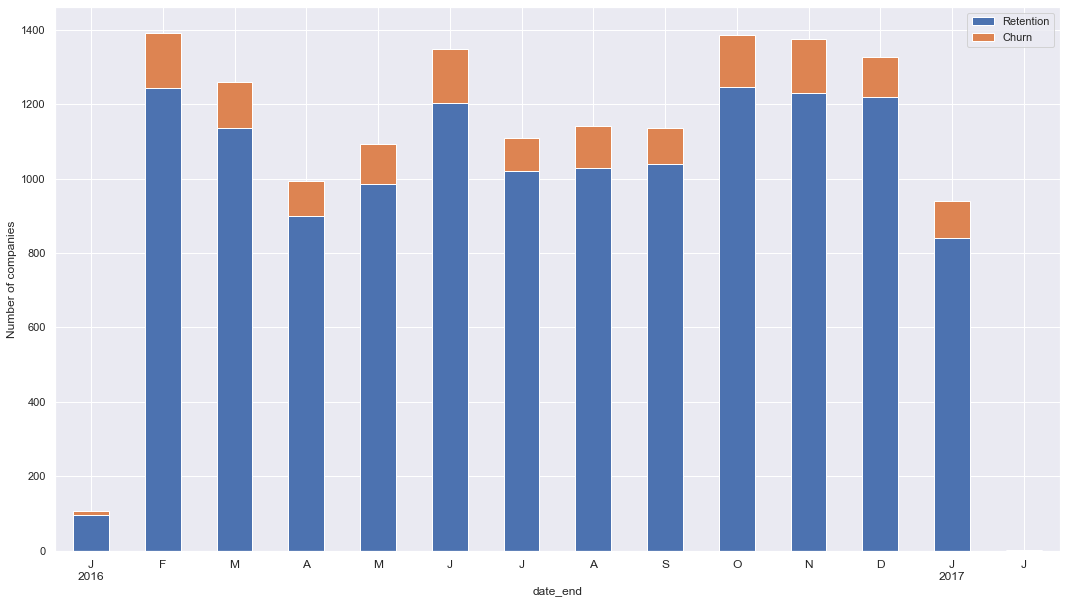

In [27]:
# churn at the end of the contract
plot_dates(dates,"date_end")

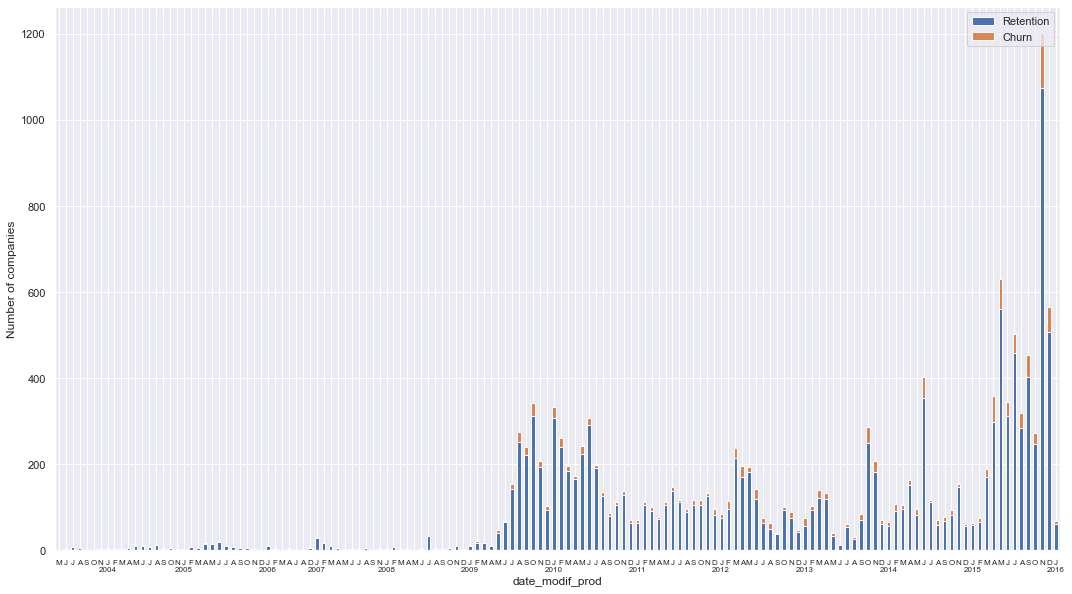

In [28]:
#churn at the last modification of the product
plot_dates(dates, "date_modif_prod", fontsize_=8)

### Contract Type ( Electricity , Gas )

In [29]:
clients['has_gas'].value_counts()

f    11955
t     2651
Name: has_gas, dtype: int64

In [30]:
contract_type = clients[["id", "has_gas", "churn"]]

In [31]:
contract = contract_type.groupby([contract_type["churn"], contract_type["has_gas"]])["id"].count().unstack(level=0)
contract

churn,0,1
has_gas,,
f,10753,1202
t,2434,217


In [32]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

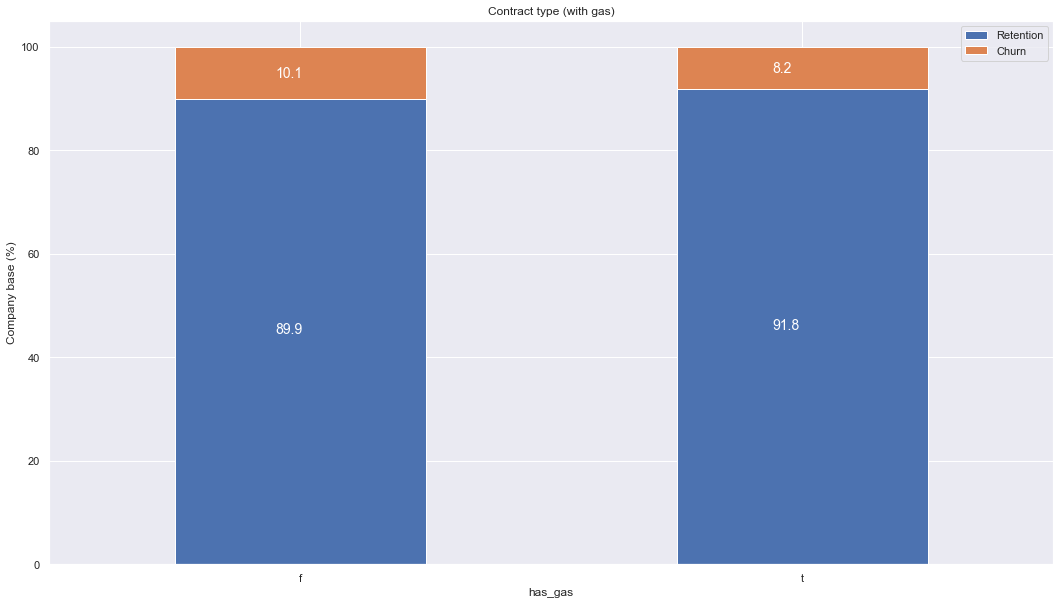

In [33]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")

### Others 

In [34]:
others = clients[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

In [35]:
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products

churn,0,1
nb_prod_act,,
1,10290.0,1141.0
2,2237.0,208.0
3,471.0,52.0
4,135.0,15.0
5,28.0,3.0
6,8.0,NaN
8,4.0,NaN
9,11.0,NaN
10,2.0,NaN


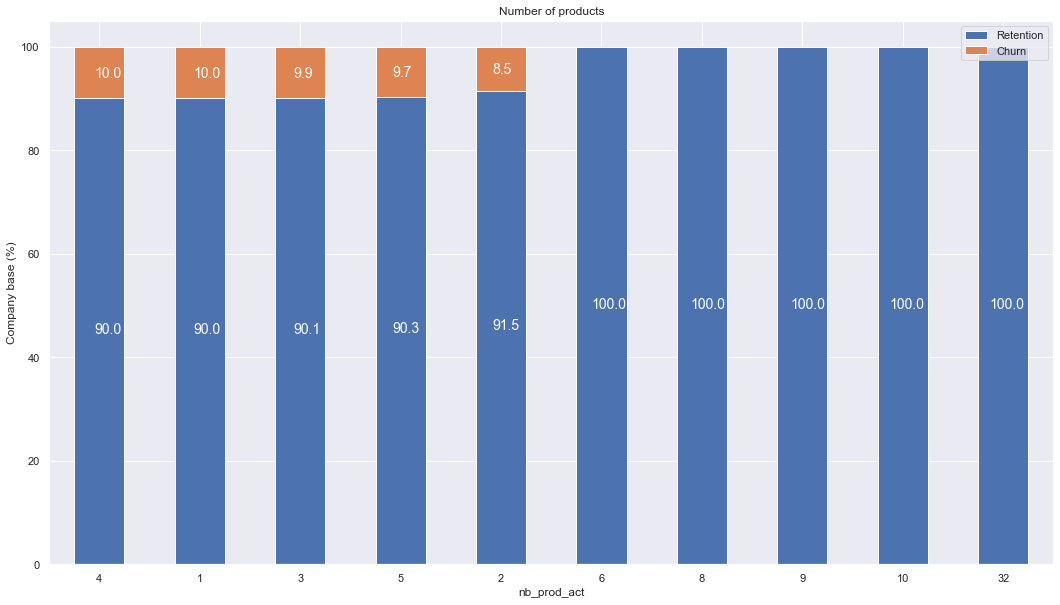

In [36]:
# churn at number of active products and services
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

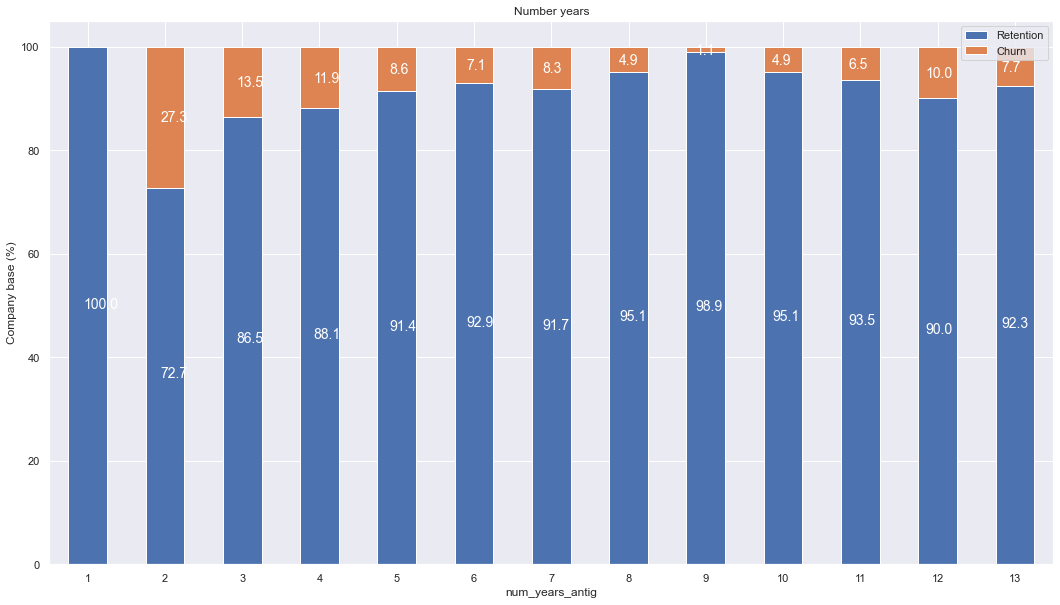

In [37]:
# churn of clients by number of years
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

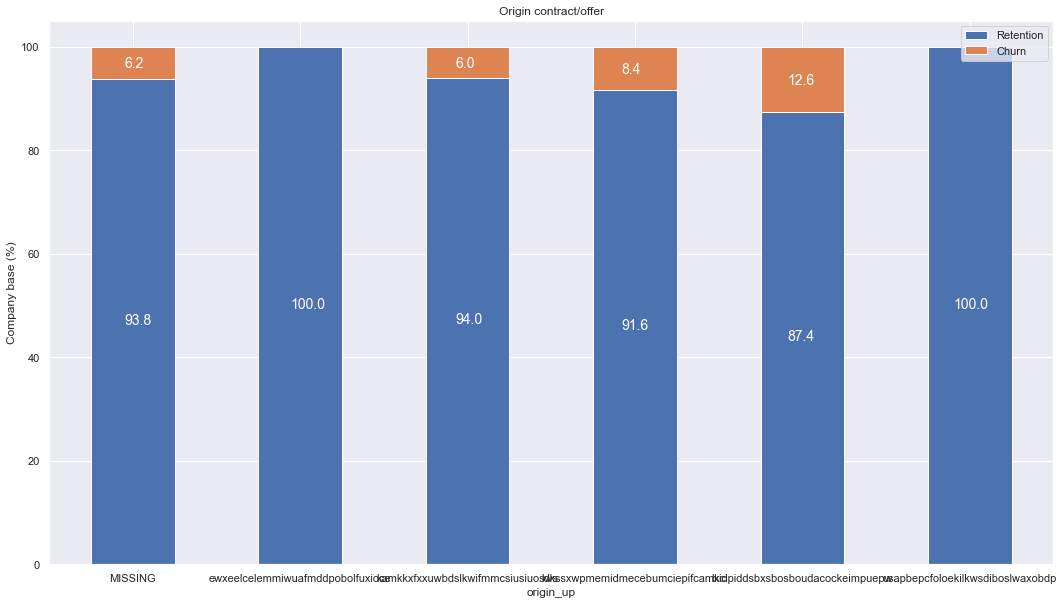

In [38]:
# churn rates of customers by the electricity campaign the customer first subscribed to
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

## 6.Data Cleaning

### Missing Values 

In [39]:
# Report the missing percentage of each data column
pd.DataFrame({"Missing values (%)":clients.isnull().sum()/len(clients.index)*100})

,Missing values (%)
id,0.0
channel_sales,0.0
cons_12m,0.0
cons_gas_12m,0.0
cons_last_month,0.0
date_activ,0.0
date_end,0.0
date_modif_prod,0.0
date_renewal,0.0
forecast_cons_12m,0.0


### Duplicates
We want to make sure all the data we have is unique and we don't have any duplicated rows. 


In [40]:
clients[clients.duplicated()]

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


In [41]:
prices[prices.duplicated()]

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix


## 6.Hypothesis investigation

### Formatting dates (in the original dataframe)
In order to use the dates in our churn prediction model we are going to change the representation of these dates. 

Instead of using the date itself, wewill be transforming it in number of months. 

In order to make this transformation we need to change the dates to
datetime
and create a
reference date
which will be January 2016

In [42]:
# Transform date columns to datetime type
# Transform date columns to datetime type
clients["date_activ"] = pd.to_datetime(clients["date_activ"], format='%Y-%m-%d')
clients["date_end"] = pd.to_datetime(clients["date_end"], format='%Y-%m-%d')
clients["date_modif_prod"] = pd.to_datetime(clients["date_modif_prod"], format='%Y-%m-%d')
clients["date_renewal"] = pd.to_datetime(clients["date_renewal"], format='%Y-%m-%d')
prices['price_date'] = pd.to_datetime(prices['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = prices.groupby(['id']).mean().reset_index()
mean_6m = prices[prices['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = prices[prices['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",
        "price_peak_var": "mean_year_price_p2_var",
        "price_mid_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_peak_fix": "mean_year_price_p2_fix",
        "price_mid_peak_fix": "mean_year_price_p3_fix"
    }
)

In [43]:
mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_6m_price_p1_var",
        "price_peak_var": "mean_6m_price_p2_var",
        "price_mid_peak_var": "mean_6m_price_p3_var",
        "price_off_peak_fix": "mean_6m_price_p1_fix",
        "price_peak_fix": "mean_6m_price_p2_fix",
        "price_mid_peak_fix": "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"
    }
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [44]:
price_features.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Now lets merge in the churn and see whether price has any correlation with churn

In [45]:
price_analysis = pd.merge(price_features, clients[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


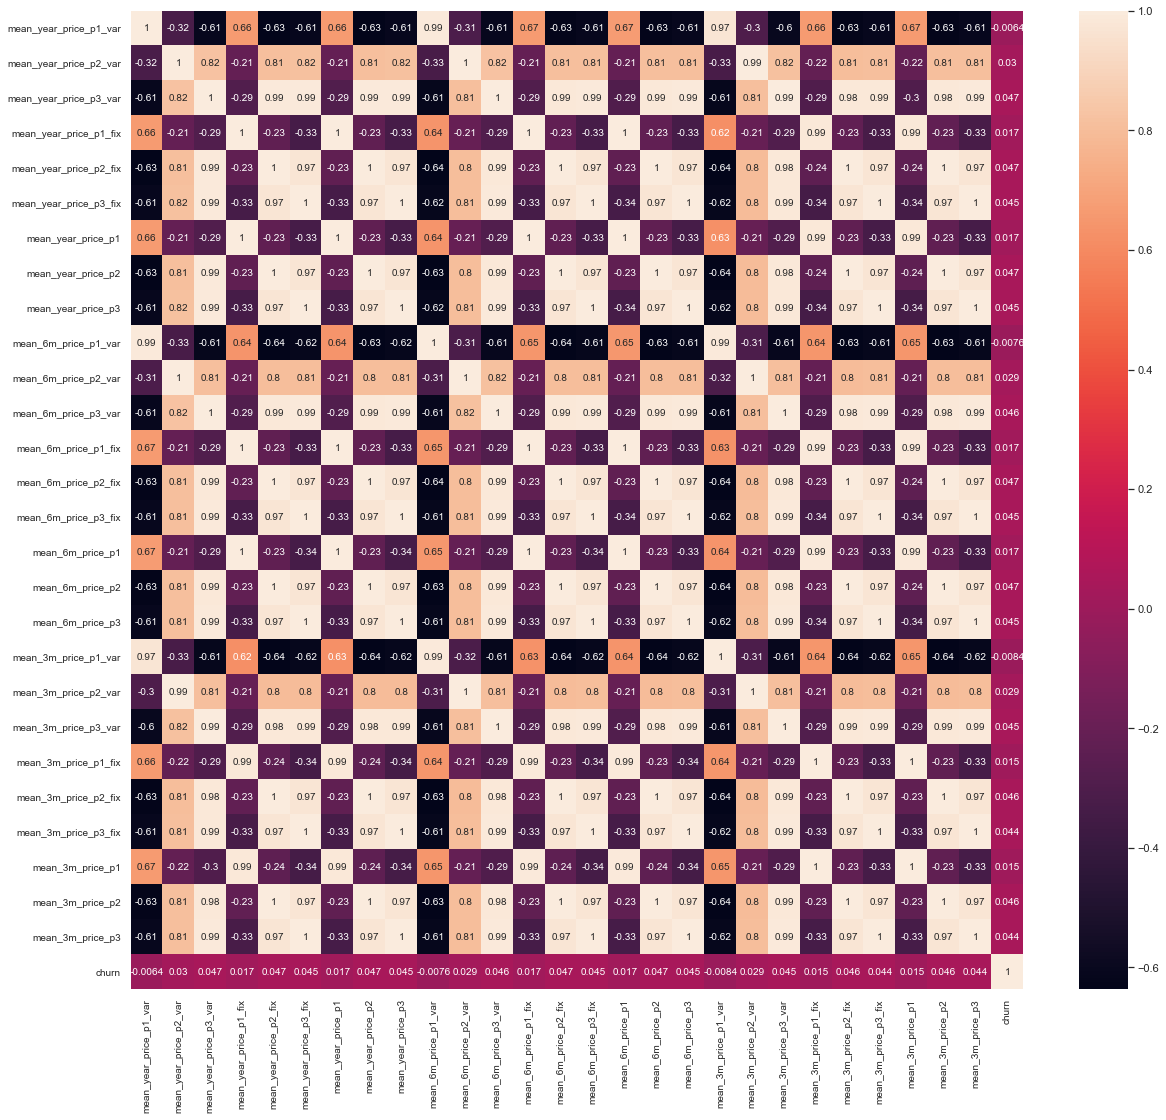

In [46]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.

In [47]:
merged_data = pd.merge(clients.drop(columns=['churn']), price_analysis, on='id')

In [48]:
merged_data.to_csv('clean_data_after_eda.csv')

## 7. Feature Engineering

In [49]:
df = pd.read_csv('./clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [50]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.03691,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.00000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.00000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


#### Difference between off-peak prices in December and preceding January



In [51]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [52]:
 # Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 
                                                                  'price_off_peak_fix': 'mean'}).reset_index()
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
...,...,...,...,...
192997,ffff7fa066f1fb305ae285bb03bf325a,2015-08-01,0.119916,40.728885
192998,ffff7fa066f1fb305ae285bb03bf325a,2015-09-01,0.119916,40.728885
192999,ffff7fa066f1fb305ae285bb03bf325a,2015-10-01,0.119916,40.728885
193000,ffff7fa066f1fb305ae285bb03bf325a,2015-11-01,0.119916,40.728885


In [53]:
# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()
dec_prices

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
...,...,...,...,...
16091,ffef185810e44254c3a4c6395e6b4d8a,2015-12-01,0.112488,40.728885
16092,fffac626da707b1b5ab11e8431a4d0a2,2015-12-01,0.145047,44.444710
16093,fffc0cacd305dd51f316424bbb08d1bd,2015-12-01,0.151399,41.228885
16094,fffe4f5646aa39c7f97f95ae2679ce64,2015-12-01,0.118175,40.728885


In [54]:
# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), 
                jan_prices.drop(columns='price_date'), on='id')

diff.head()

,id,price_date,dec_1,dec_2,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885,0.126098,40.565969
1,0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710,0.148047,44.266931
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710,0.150837,44.444710
3,0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885,0.123086,40.565969
4,00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930,0.149434,44.266931


In [55]:
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [56]:
df = pd.merge(df, diff, on='id')
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.036910,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.020057,3.700961
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-0.003767,0.177779
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-0.004670,0.177779
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-0.004547,0.177779
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,-0.006192,0.162916


---

## Average price changes across periods

We can now enhance the feature that our colleague made by calculating the average price changes across individual periods, instead of the entire year.

In [57]:
# Aggregate average prices per period by company
mean_prices = price_df.groupby(['id']).agg({
    'price_off_peak_var': 'mean', 
    'price_peak_var': 'mean', 
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'    
}).reset_index()

In [58]:
# Calculate the mean difference between consecutive periods
mean_prices['off_peak_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_peak_var']
mean_prices['peak_mid_peak_var_mean_diff'] = mean_prices['price_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_mid_peak_var_mean_diff'] = mean_prices['price_off_peak_var'] - mean_prices['price_mid_peak_var']
mean_prices['off_peak_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_peak_fix']
mean_prices['peak_mid_peak_fix_mean_diff'] = mean_prices['price_peak_fix'] - mean_prices['price_mid_peak_fix']
mean_prices['off_peak_mid_peak_fix_mean_diff'] = mean_prices['price_off_peak_fix'] - mean_prices['price_mid_peak_fix']

In [59]:
columns = [
    'id', 
    'off_peak_peak_var_mean_diff',
    'peak_mid_peak_var_mean_diff', 
    'off_peak_mid_peak_var_mean_diff',
    'off_peak_peak_fix_mean_diff', 
    'peak_mid_peak_fix_mean_diff', 
    'off_peak_mid_peak_fix_mean_diff'
]
df = pd.merge(df, mean_prices[columns], on='id')
df.head()

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p3,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,off_peak_peak_var_mean_diff,peak_mid_peak_var_mean_diff,off_peak_mid_peak_var_mean_diff,off_peak_peak_fix_mean_diff,peak_mid_peak_fix_mean_diff,off_peak_mid_peak_fix_mean_diff
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,8.182687,1,0.020057,3.700961,0.024038,0.034219,0.058257,18.590255,7.450670,26.040925
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.000000,0,-0.003767,0.177779,0.142485,0.007124,0.149609,44.311375,0.000000,44.311375
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.000000,0,-0.004670,0.177779,0.082090,0.088421,0.170512,44.385450,0.000000,44.385450
3,3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,...,0.000000,0,-0.004547,0.177779,0.151210,0.000000,0.151210,44.400265,0.000000,44.400265
4,4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,...,16.365274,0,-0.006192,0.162916,0.020536,0.030773,0.051309,16.275263,8.137629,24.412893
